Import simulator and utilities

In [1]:
from src.base import FDTD2D
from src.utilities import print_setup_info
from src.detectors import PointDetector
from src.sources import PointSource, LineSource

from src.viz import viz2D

### Setting the simulation parameters from a dictionary

In [8]:
# Parameters
params = {
    'nx': 200,
    'ny': 200,
    'time_steps': 250,
    'dx':25e-9,
    'dy': 25e-9,
    # PML
    'use_pml' : True,
    'pml_thickness': 20,
    'polarization': 'TM',
    # TFSF
    'tfsf_thickness': 10,
    'order': 1,
    'r_err': 1e-6,
    # source
    'source_type': 'plane_wave',
    'form_type': 'gaussian',
    'plane_x1' : 7,
    'plane_x2' :193,
    'plane_y1' : 7,
    'plane_y2' : 193
}

### Testing initializations

In [2]:
#tm_sim = FDTD2D(params = params)
sim = FDTD2D(config_file = 'config.yaml')

Reading configuration from file...


### Set detectors

In [3]:
point_detector = PointDetector("point1", (50, 50))
sim.add_detector(point_detector)

### Set sources

In [4]:
point_source = PointSource(source_x=sim.source_x, source_y=sim.source_y, function=sim.function, frequency=sim.frequency)
sim.add_source(point_source)

In [10]:
line_source = LineSource(x=sim.line_x, y1=sim.line_y1, y2=sim.line_y2, function=sim.function, frequency=sim.frequency)
sim.add_source(line_source)

AttributeError: 'FDTD2D' object has no attribute 'line_x'

### Set geometry

The geometry for this test is absent. Propagation in air.

### Print simulation info

In [4]:
print_setup_info(sim)

Simulation setup information:
nx: 200
ny: 100
time_steps: 10
time: 0.0
dx: 5e-08
dy: 5e-08
dt: 1.6678204759907602e-16


AttributeError: 'FDTD2D' object has no attribute 'use_pml'

### Show material distribution

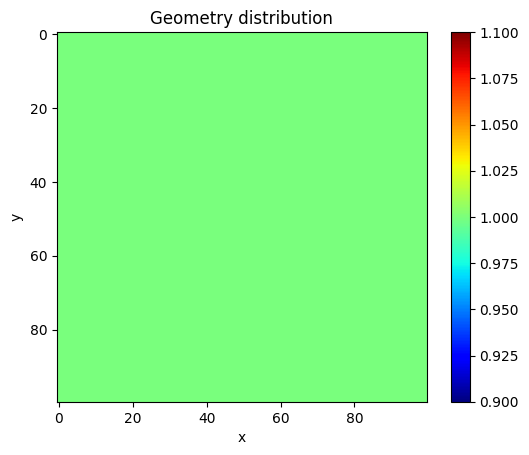

In [5]:
# Visualize permittivity distribution
from matplotlib import pyplot as plt
plt.imshow(sim.eps_r, cmap='jet')
plt.title('Geometry distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(cmap='jet')
plt.show()

### Test simulation

In [5]:
for i in range(1, sim.time_steps):
        sim.simulation_step(i)
        sim.time += sim.dt

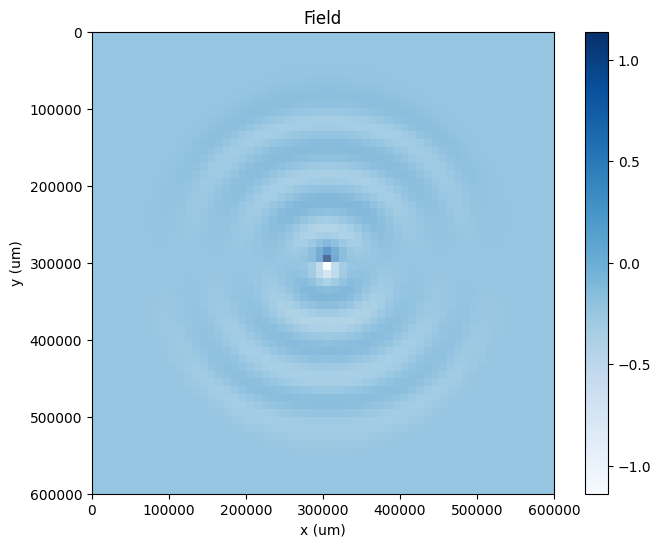

In [6]:
viz2D(sim, sim.e_field[:,:,0])

TypeError: Invalid shape (3, 2, 100) for image data

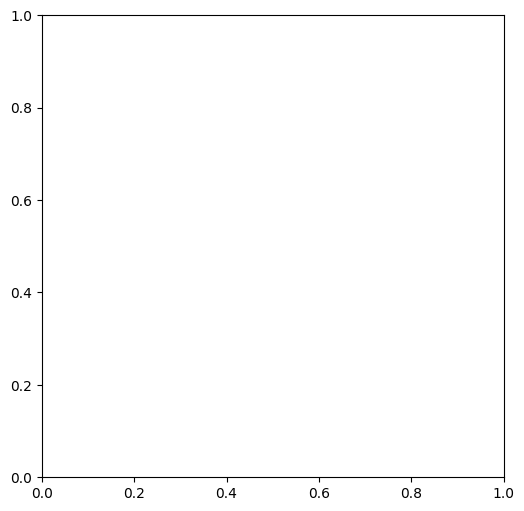

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# assume that you have already initialized your FDTD simulation and calculated the Ez field and the geometry mask
# you can modify the code below according to your simulation setup

# plot the Ez field with cmap jet
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.transpose(sim.e_field[:,:2]), cmap='jet', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0])
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Ez Field')
# plot the geometry mask with cmap binary
ax.imshow(np.transpose(sim.eps_r), cmap='binary', extent=[0, sim.nx*sim.dx*1e6, sim.ny*sim.dy*1e6, 0],alpha=0.3)

fig.colorbar(im)

plt.show()

In [8]:
print(sim.e_field[45:55,45:55,2])

tensor([[-2.9407e+70,  3.2312e+70, -3.4547e+70,  3.6044e+70, -3.6851e+70,
          3.7092e+70, -3.6851e+70,  3.6044e+70, -3.4547e+70,  3.2312e+70],
        [ 3.2312e+70, -3.5190e+70,  3.7215e+70, -3.8353e+70,  3.8776e+70,
         -3.8827e+70,  3.8776e+70, -3.8353e+70,  3.7215e+70, -3.5190e+70],
        [-3.4547e+70,  3.7215e+70, -3.8764e+70,  3.9165e+70, -3.8749e+70,
          3.8313e+70, -3.8749e+70,  3.9165e+70, -3.8764e+70,  3.7215e+70],
        [ 3.6044e+70, -3.8353e+70,  3.9165e+70, -3.8330e+70,  3.6218e+70,
         -3.4405e+70,  3.6218e+70, -3.8330e+70,  3.9165e+70, -3.8353e+70],
        [-3.6851e+70,  3.8776e+70, -3.8749e+70,  3.6218e+70, -3.0899e+70,
          2.4487e+70, -3.0899e+70,  3.6218e+70, -3.8749e+70,  3.8776e+70],
        [ 3.7092e+70, -3.8827e+70,  3.8313e+70, -3.4405e+70,  2.4487e+70,
         -5.7041e-01,  2.4487e+70, -3.4405e+70,  3.8313e+70, -3.8827e+70],
        [-3.6851e+70,  3.8776e+70, -3.8749e+70,  3.6218e+70, -3.0899e+70,
          2.4487e+70, -3.0899e+7

c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\Users\mazzo\anaconda3\envs\fdtd\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


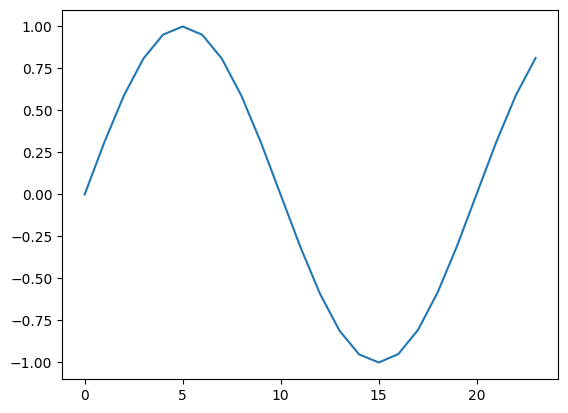

In [10]:
from matplotlib import pyplot as plt
plt.plot(point_detector.recorded_values)

In [11]:
#sim.ca
sim.cb
#sim.da
#sim.db

tensor([[376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        ...,
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303]],
       dtype=torch.float64)

In [10]:
!pip install vtk

In [67]:
import numpy as np
import vtk
from vtk.util import numpy_support

tm_sim.nx, tm_sim.ny = tm_sim.Dz.shape

# Convert the numpy arrays to vtkImageData
energy_data = numpy_support.numpy_to_vtk(tm_sim.Dz.ravel(), deep=True, array_type=vtk.VTK_FLOAT)
geometry_data = numpy_support.numpy_to_vtk(tm_sim.gaz.ravel(), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR)

energy_image = vtk.vtkImageData()
energy_image.SetDimensions(tm_sim.nx, tm_sim.ny, 1)
energy_image.GetPointData().SetScalars(energy_data)

# geometry_image = vtk.vtkImageData()
# geometry_image.SetDimensions(tm_sim.nx, tm_sim.ny, 1)
# geometry_image.GetPointData().SetScalars(geometry_data)

# Create actors for energy and geometry data
energy_mapper = vtk.vtkDataSetMapper()
energy_mapper.SetInputData(energy_image)
energy_actor = vtk.vtkActor()
energy_actor.SetMapper(energy_mapper)

# geometry_mapper = vtk.vtkDataSetMapper()
# geometry_mapper.SetInputData(geometry_image)
# geometry_actor = vtk.vtkActor()
# geometry_actor.SetMapper(geometry_mapper)

# Set up the renderer and render window
renderer = vtk.vtkRenderer()
renderer.AddActor(energy_actor)
# renderer.AddActor(geometry_actor)
renderer.SetBackground(0.2, 0.2, 0.2)

render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetSize(800, 800)

# Set up the interactor and start the visualization
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(render_window)
interactor.Initialize()
interactor.Start()

In [12]:
sim.dt/(sim.eps_0*sim.eps_r*sim.dx)

tensor([[376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        ...,
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303],
        [376.7303, 376.7303, 376.7303,  ..., 376.7303, 376.7303, 376.7303]],
       dtype=torch.float64)

In [11]:
sim.dt/(sim.mu_0*sim.mu_r*sim.dx)

tensor([[0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        ...,
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027]],
       dtype=torch.float64)

In [6]:
sim.db

tensor([[0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        ...,
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027],
        [0.0027, 0.0027, 0.0027,  ..., 0.0027, 0.0027, 0.0027]],
       dtype=torch.float64)

In [13]:
import numpy as np
mu_r = 1  # Relative permeability in air
sigma_m = 0  # Magnetic conductivity in air
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (H/m)
c = 299792458  # Speed of light (m/s)
dx = 1e-9  # Spatial step (m)
dt = dx/(2*c)
# Calculate da and db for air
da_air = (1 - (sigma_m * dt) / (2 * mu_0 * mu_r)) / (1 + (sigma_m * dt) / (2 * mu_0 * mu_r))
db_air = (dt / (mu_0 * mu_r * dx)) / (1 + (sigma_m * dt) / (2 * mu_0 * mu_r))

print("da_air:", da_air)
print("db_air:", db_air)

da_air: 1.0
db_air: 0.0013272093647190362


In [14]:
eps_r = 1  # Relative permittivity in air
sigma = 0  # Electric conductivity in air
eps_0 = 8.854e-12  # Permittivity of free space (F/m)

# Calculate ca and cb for air
ca_air = (1 - (sigma * dt) / (2 * eps_0 * eps_r)) / (1 + (sigma * dt) / (2 * eps_0 * eps_r))
cb_air = (dt / (eps_0 * eps_r * dx )) #/ (1 + (sigma * dt) / (2 * eps_0 * eps_r))

print("ca_air:", ca_air)
print("cb_air:", cb_air)

ca_air: 1.0
cb_air: 188.36915247241478


In [11]:
eaf = dt *sigma /(2 * eps_0 *eps_r)
ca = (1 - eaf)/ (1 + eaf)
cb = 0.5/(eps_r*( 1 + eaf))
print(ca)
print(cb)

1.0
0.5


In [10]:
sim.da
#sim.db
#sim.ca
#sim.cb


tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], dtype=torch.float64)